# PyTorch Fundamentals

Welcome to the PyTorch Fundamentals notebook! This comprehensive tutorial will guide you through the essential concepts of PyTorch, focusing on tensor operations, autograd, and computational graphs.

## Learning Objectives
By the end of this notebook, you will:
- Understand PyTorch tensors and their operations
- Master tensor creation, manipulation, and mathematical operations
- Learn about autograd and automatic differentiation
- Understand computational graphs and gradient computation
- Practice with interactive exercises and visualizations

Let's get started!

In [4]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.autograd import Variable
import torch.nn.functional as F

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.8.0+cpu
CUDA available: False


## 1. Introduction to Tensors

Tensors are the fundamental data structure in PyTorch. They are similar to NumPy arrays but with additional capabilities for GPU computation and automatic differentiation.

### What is a Tensor?
- A tensor is a multi-dimensional array
- 0D tensor: scalar (single number)
- 1D tensor: vector (array of numbers)
- 2D tensor: matrix (2D array)
- 3D+ tensor: higher-dimensional arrays

## 2. Tensor Creation

Let's explore different ways to create tensors in PyTorch.

In [16]:
# Creating tensors from data
print("=== Creating Tensors from Data ===")

# From Python lists
data = [[1, 2], [3, 4]]
tensor_from_list = torch.tensor(data)
print(f"From list: \n{tensor_from_list}")
print(f"Shape: {tensor_from_list.shape}")
print(f"Data type: {tensor_from_list.dtype}")
print()

# From NumPy arrays
np_array = np.array([[1.0, 2.0], [3.0, 4.0]])
tensor_from_numpy = torch.from_numpy(np_array)
print(f"From NumPy: \n{tensor_from_numpy}")
print(f"Data type: {tensor_from_numpy.dtype}")
print()

# Different data types
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
bool_tensor = torch.tensor([True, False, True], dtype=torch.bool)

print(f"Integer tensor: {int_tensor} (dtype: {int_tensor.dtype}) | Shape: {int_tensor.shape}")
print(f"Float tensor: {float_tensor} (dtype: {float_tensor.dtype}) | Shape: {float_tensor.shape}")
print(f"Boolean tensor: {bool_tensor} (dtype: {bool_tensor.dtype})")

=== Creating Tensors from Data ===
From list: 
tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Data type: torch.int64

From NumPy: 
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
Data type: torch.float64

Integer tensor: tensor([1, 2, 3], dtype=torch.int32) (dtype: torch.int32) | Shape: torch.Size([3])
Float tensor: tensor([1., 2., 3.]) (dtype: torch.float32) | Shape: torch.Size([3])
Boolean tensor: tensor([ True, False,  True]) (dtype: torch.bool)


In [31]:
# Creating tensors with specific values
print("=== Creating Tensors with Specific Values ===")

# Zeros and ones
zeros = torch.zeros(3, 4)
ones = torch.ones(2, 3)
print(f"Zeros tensor (3x4): \n{zeros}")
print(f"Ones tensor (2x3): \n{ones}")
print()

# Identity matrix
identity = torch.eye(3)
print(f"Identity matrix (3x3): \n{identity}")
print()

# Random tensors
random_uniform = torch.rand(2, 3)  # Uniform distribution [0, 1)
random_normal = torch.randn(2, 3)  # Normal distribution (mean=0, std=1)
print(f"Random uniform: \n{random_uniform}")
print(f"Random normal: \n{random_normal}")
print()

# Range tensors
range_tensor = torch.arange(0, 10, 2)  # start, end, step
linspace_tensor = torch.linspace(0, 1, 5)  # start, end, num_points
print(f"Range tensor: {range_tensor}")
print(f"Linspace tensor: {linspace_tensor}")

=== Creating Tensors with Specific Values ===
Zeros tensor (3x4): 
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Ones tensor (2x3): 
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Identity matrix (3x3): 
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Random uniform: 
tensor([[0.4951, 0.1197, 0.0716],
        [0.0323, 0.7047, 0.2545]])
Random normal: 
tensor([[ 0.2694,  0.7482, -1.3798],
        [ 1.1960, -0.1731, -0.8167]])

Range tensor: tensor([0, 2, 4, 6, 8])
Linspace tensor: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


### 🎯 Exercise 1: Tensor Creation Practice

Try creating the following tensors:
1. A 4x4 tensor filled with the value 7
2. A 1D tensor with values from 5 to 15 (inclusive)
3. A 3x3 random tensor with values between -1 and 1

In [20]:
# Exercise 1 - Your code here
print("=== Exercise 1 Solutions ===")

# 1. 4x4 tensor filled with 7
sevens = torch.full((4, 4), 7)
print(f"4x4 tensor of 7s: \n{sevens}")
print()

# 2. 1D tensor from 5 to 15
range_5_15 = torch.arange(5, 16)
print(f"Range 5-15: {range_5_15}")
print()

# 3. 3x3 random tensor between -1 and 1
random_scaled = torch.rand(3, 3) * 2 - 1  # Scale [0,1) to [-1,1)
print(f"Random 3x3 [-1,1]: \n{random_scaled}")

=== Exercise 1 Solutions ===
4x4 tensor of 7s: 
tensor([[7, 7, 7, 7],
        [7, 7, 7, 7],
        [7, 7, 7, 7],
        [7, 7, 7, 7]])

Range 5-15: tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Random 3x3 [-1,1]: 
tensor([[ 0.2880,  0.4142,  0.3163],
        [-0.0174,  0.7826, -0.7105],
        [ 0.0630, -0.6825,  0.3084]])


## 3. Tensor Properties and Mathematical Operations

Understanding tensor properties and operations is crucial for effective PyTorch programming.

In [21]:
# Tensor properties
print("=== Tensor Properties ===")

# Create a sample tensor
sample_tensor = torch.randn(3, 4, 5)

print(f"Shape: {sample_tensor.shape}")
print(f"Size: {sample_tensor.size()}")
print(f"Number of dimensions: {sample_tensor.ndim}")
print(f"Number of elements: {sample_tensor.numel()}")
print(f"Data type: {sample_tensor.dtype}")
print(f"Device: {sample_tensor.device}")
print(f"Requires gradient: {sample_tensor.requires_grad}")
print()

# Element-wise operations
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print(f"Tensor A: \n{a}")
print(f"Tensor B: \n{b}")
print(f"Addition (A + B): \n{a + b}")
print(f"Multiplication (A * B): \n{a * b}")
print(f"Matrix multiplication (A @ B): \n{a @ b}")

=== Tensor Properties ===
Shape: torch.Size([3, 4, 5])
Size: torch.Size([3, 4, 5])
Number of dimensions: 3
Number of elements: 60
Data type: torch.float32
Device: cpu
Requires gradient: False

Tensor A: 
tensor([[1., 2.],
        [3., 4.]])
Tensor B: 
tensor([[5., 6.],
        [7., 8.]])
Addition (A + B): 
tensor([[ 6.,  8.],
        [10., 12.]])
Multiplication (A * B): 
tensor([[ 5., 12.],
        [21., 32.]])
Matrix multiplication (A @ B): 
tensor([[19., 22.],
        [43., 50.]])


## 4. Automatic Differentiation with Autograd

One of PyTorch's most powerful features is automatic differentiation through the autograd system. This is essential for training neural networks.

In [22]:
# Introduction to autograd
print("=== Introduction to Autograd ===")

# Create tensors that require gradients
x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)

print(f"x: {x}, requires_grad: {x.requires_grad}")
print(f"y: {y}, requires_grad: {y.requires_grad}")
print()

# Perform operations
z = x**2 + y**3
print(f"z = x² + y³ = {z}")
print(f"z requires_grad: {z.requires_grad}")
print()

# Compute gradients
z.backward()

print(f"dz/dx = 2x = {x.grad}")
print(f"dz/dy = 3y² = {y.grad}")
print()

# Verify manually
print(f"Manual calculation - dz/dx at x=2: 2*2 = {2*2}")
print(f"Manual calculation - dz/dy at y=3: 3*3² = {3*3**2}")

=== Introduction to Autograd ===
x: tensor([2.], requires_grad=True), requires_grad: True
y: tensor([3.], requires_grad=True), requires_grad: True

z = x² + y³ = tensor([31.], grad_fn=<AddBackward0>)
z requires_grad: True

dz/dx = 2x = tensor([4.])
dz/dy = 3y² = tensor([27.])

Manual calculation - dz/dx at x=2: 2*2 = 4
Manual calculation - dz/dy at y=3: 3*3² = 27


In [23]:
# Computational graphs
print("=== Computational Graph Example ===")

# Create leaf tensors (inputs)
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([3.0], requires_grad=True)

print(f"Leaf tensors:")
print(f"a: {a}, is_leaf: {a.is_leaf}")
print(f"b: {b}, is_leaf: {b.is_leaf}")
print()

# Build computational graph
c = a + b
d = a * b
e = c * d

print(f"Intermediate tensors:")
print(f"c = a + b = {c}, is_leaf: {c.is_leaf}")
print(f"d = a * b = {d}, is_leaf: {d.is_leaf}")
print(f"e = c * d = {e}, is_leaf: {e.is_leaf}")
print()

# Check gradient functions
print(f"Gradient functions:")
print(f"c.grad_fn: {c.grad_fn}")
print(f"d.grad_fn: {d.grad_fn}")
print(f"e.grad_fn: {e.grad_fn}")
print()

# Compute gradients
e.backward()
print(f"Gradients:")
print(f"de/da: {a.grad}")
print(f"de/db: {b.grad}")

=== Computational Graph Example ===
Leaf tensors:
a: tensor([2.], requires_grad=True), is_leaf: True
b: tensor([3.], requires_grad=True), is_leaf: True

Intermediate tensors:
c = a + b = tensor([5.], grad_fn=<AddBackward0>), is_leaf: False
d = a * b = tensor([6.], grad_fn=<MulBackward0>), is_leaf: False
e = c * d = tensor([30.], grad_fn=<MulBackward0>), is_leaf: False

Gradient functions:
c.grad_fn: <AddBackward0 object at 0xffff19b15660>
d.grad_fn: <MulBackward0 object at 0xffff19b17730>
e.grad_fn: <MulBackward0 object at 0xffff19b15660>

Gradients:
de/da: tensor([21.])
de/db: tensor([16.])


## 5. Practical Example: Linear Regression

Let's apply what we've learned to implement a simple linear regression using autograd.

In [33]:
# Linear regression with autograd
print("=== Linear Regression with Autograd ===")

# Generate synthetic data
torch.manual_seed(42)
n_samples = 100
true_w = 2.0
true_b = 1.0

# Generate data: y = 2x + 1 + noise
X = torch.randn(n_samples, 1)
y = true_w * X + true_b + 0.1 * torch.randn(n_samples, 1)

print(f"Data shape - X: {X.shape}, y: {y.shape}")
print(f"True parameters - w: {true_w}, b: {true_b}")
print()

# Initialize parameters
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(f"Initial parameters - w: {w.item():.4f}, b: {b.item():.4f}")

# Training parameters
learning_rate = 0.01
n_epochs = 1000

# Training loop
losses = []
for epoch in range(n_epochs):
    # Forward pass
    y_pred = X @ w + b
    
    # Compute loss (MSE)
    loss = torch.mean((y_pred - y)**2)
    losses.append(loss.item())
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1:4d}: Loss = {loss.item():.6f}, w = {w.item():.4f}, b = {b.item():.4f}")

print(f"\nFinal parameters - w: {w.item():.4f}, b: {b.item():.4f}")
print(f"True parameters  - w: {true_w:.4f}, b: {true_b:.4f}")
print(f"Parameter errors - w: {abs(w.item() - true_w):.4f}, b: {abs(b.item() - true_b):.4f}")

=== Linear Regression with Autograd ===
Data shape - X: torch.Size([100, 1]), y: torch.Size([100, 1])
True parameters - w: 2.0, b: 1.0

Initial parameters - w: 0.3932, b: -0.2148
Epoch  200: Loss = 0.008848, w = 1.9735, b = 0.9889
Epoch  400: Loss = 0.007804, w = 2.0007, b = 1.0034
Epoch  600: Loss = 0.007804, w = 2.0012, b = 1.0036
Epoch  800: Loss = 0.007804, w = 2.0012, b = 1.0036
Epoch 1000: Loss = 0.007804, w = 2.0012, b = 1.0036

Final parameters - w: 2.0012, b: 1.0036
True parameters  - w: 2.0000, b: 1.0000
Parameter errors - w: 0.0012, b: 0.0036


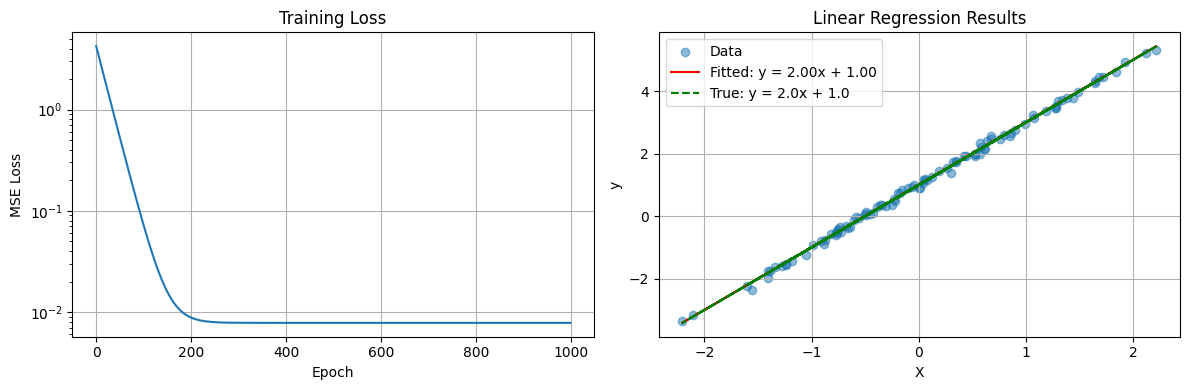

In [34]:
# Visualize the results
plt.figure(figsize=(12, 4))

# Plot 1: Training loss
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.grid(True)

# Plot 2: Data and fitted line
plt.subplot(1, 2, 2)
X_np = X.detach().numpy()
y_np = y.detach().numpy()
y_pred_np = (X @ w + b).detach().numpy()

plt.scatter(X_np, y_np, alpha=0.5, label='Data')
plt.plot(X_np, y_pred_np, 'r-', label=f'Fitted: y = {w.item():.2f}x + {b.item():.2f}')
plt.plot(X_np, true_w * X_np + true_b, 'g--', label=f'True: y = {true_w}x + {true_b}')
plt.title('Linear Regression Results')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 🎯 Exercise 2: Mini Neural Network

As a final exercise, try to implement a simple neural network from scratch using only the concepts learned in this notebook. Create a network that can classify 2D points into two classes.

In [41]:
# Final Challenge - Mini Neural Network
print("=== Final Challenge: Mini Neural Network ===")

# Generate 2D classification data
torch.manual_seed(42)
n_samples = 200

# Create two clusters
class1 = torch.randn(n_samples//2, 2) + torch.tensor([2.0, 2.0])
class2 = torch.randn(n_samples//2, 2) + torch.tensor([-2.0, -2.0])

X = torch.cat([class1, class2], dim=0)
y = torch.cat([torch.zeros(n_samples//2, 1), torch.ones(n_samples//2, 1)], dim=0)

print(f"Data shape: X = {X.shape}, y = {y.shape}")

# Simple neural network: 2 -> 4 -> 1
# Initialize weights and biases (create fresh tensors each time)
torch.manual_seed(42)  # Reset seed for reproducible initialization
W1 = torch.randn(2, 4) * 0.1
b1 = torch.zeros(4)
W2 = torch.randn(4, 1) * 0.1
b2 = torch.zeros(1)

# Enable gradients
W1.requires_grad_(True)
b1.requires_grad_(True)
W2.requires_grad_(True)
b2.requires_grad_(True)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Training parameters
learning_rate = 0.1
n_epochs = 1000

# Training loop
for epoch in range(n_epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = sigmoid(z2)
    
    # Binary cross-entropy loss
    loss = -torch.mean(y * torch.log(y_pred + 1e-8) + (1 - y) * torch.log(1 - y_pred + 1e-8))
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        if W1.grad is not None:
            W1 -= learning_rate * W1.grad
        if b1.grad is not None:
            b1 -= learning_rate * b1.grad
        if W2.grad is not None:
            W2 -= learning_rate * W2.grad
        if b2.grad is not None:
            b2 -= learning_rate * b2.grad
    
    # Zero gradients
    if W1.grad is not None:
        W1.grad.zero_()
    if b1.grad is not None:
        b1.grad.zero_()
    if W2.grad is not None:
        W2.grad.zero_()
    if b2.grad is not None:
        b2.grad.zero_()
    
    if (epoch + 1) % 200 == 0:
        accuracy = ((y_pred > 0.5).float() == y).float().mean()
        print(f"Epoch {epoch+1:4d}: Loss = {loss.item():.4f}, Accuracy = {accuracy.item():.4f}")

# Final evaluation
with torch.no_grad():
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred_final = sigmoid(z2)
    final_accuracy = ((y_pred_final > 0.5).float() == y).float().mean()
    
print(f"\nFinal Accuracy: {final_accuracy.item():.4f}")
print("\n🎉 Congratulations! You've successfully implemented a neural network from scratch using PyTorch fundamentals!")

=== Final Challenge: Mini Neural Network ===
Data shape: X = torch.Size([200, 2]), y = torch.Size([200, 1])
Epoch  200: Loss = 0.1412, Accuracy = 1.0000
Epoch  400: Loss = 0.0547, Accuracy = 1.0000
Epoch  600: Loss = 0.0334, Accuracy = 1.0000
Epoch  800: Loss = 0.0241, Accuracy = 1.0000
Epoch 1000: Loss = 0.0189, Accuracy = 1.0000

Final Accuracy: 1.0000

🎉 Congratulations! You've successfully implemented a neural network from scratch using PyTorch fundamentals!


## Summary and Key Takeaways

Congratulations! You've completed the PyTorch Fundamentals tutorial. Here's what you've learned:

### Key Concepts Covered:
1. **Tensor Creation and Manipulation**: Different ways to create tensors and manipulate their shapes
2. **Mathematical Operations**: Element-wise operations, matrix multiplication, and reductions
3. **Automatic Differentiation**: How autograd tracks operations and computes gradients
4. **Computational Graphs**: Understanding how PyTorch builds and uses computation graphs
5. **Practical Applications**: Implementing linear regression and neural networks

### Next Steps:
- Practice with more complex tensor operations
- Explore PyTorch's neural network modules (torch.nn)
- Learn about optimizers and loss functions
- Build your first deep neural network

### Important Tips:
- Always check tensor shapes when debugging
- Remember to zero gradients in training loops
- Use `torch.no_grad()` for inference to save memory
- Move tensors to the same device before operations
- Understand broadcasting rules to avoid unexpected behavior